# UHI Index Data #

In [34]:
import pandas as pd
import os 

In [35]:
# read file
DATA_DIR = os.path.join(os.getcwd(), "..", "data")

uhi_df = pd.read_csv(os.path.join(DATA_DIR, "Training_data_uhi_index_2025-02-18.csv"))

In [36]:
# EDA
uhi_df.head()

,Longitude,Latitude,datetime,UHI Index
0,-73.909167,40.813107,24-07-2021 15:53,1.030289
1,-73.909187,40.813045,24-07-2021 15:53,1.030289
2,-73.909215,40.812978,24-07-2021 15:53,1.023798
3,-73.909242,40.812908,24-07-2021 15:53,1.023798
4,-73.909257,40.812845,24-07-2021 15:53,1.021634


In [37]:
# (row, col)
uhi_df.shape

(11229, 4)

In [38]:
uhi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  11229 non-null  float64
 1   Latitude   11229 non-null  float64
 2   datetime   11229 non-null  object 
 3   UHI Index  11229 non-null  float64
dtypes: float64(3), object(1)
memory usage: 351.0+ KB


In [39]:
uhi_df.isnull().sum()

Longitude    0
Latitude     0
datetime     0
UHI Index    0
dtype: int64

In [40]:
uhi_df.dtypes

Longitude    float64
Latitude     float64
datetime      object
UHI Index    float64
dtype: object

Data Visualization

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Making sure datetime is in datetime format
uhi_df["datetime"] = pd.to_datetime(uhi_df["datetime"])

# Extracting useful time components
uhi_df["Year"] = uhi_df["datetime"].dt.year
uhi_df["Month"] = uhi_df["datetime"].dt.month
uhi_df["Day"] = uhi_df["datetime"].dt.day
uhi_df["Hour"] = uhi_df["datetime"].dt.hour
uhi_df["Day_of_Week"] = uhi_df["datetime"].dt.dayofweek  # Monday=0, Sunday=6

uhi_df.head()

/var/folders/5w/m5jg2y417qdd5h_28np12d380000gp/T/ipykernel_86872/2943177094.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  uhi_df["datetime"] = pd.to_datetime(uhi_df["datetime"])


,Longitude,Latitude,datetime,UHI Index,Year,Month,Day,Hour,Day_of_Week
0,-73.909167,40.813107,2021-07-24 15:53:00,1.030289,2021,7,24,15,5
1,-73.909187,40.813045,2021-07-24 15:53:00,1.030289,2021,7,24,15,5
2,-73.909215,40.812978,2021-07-24 15:53:00,1.023798,2021,7,24,15,5
3,-73.909242,40.812908,2021-07-24 15:53:00,1.023798,2021,7,24,15,5
4,-73.909257,40.812845,2021-07-24 15:53:00,1.021634,2021,7,24,15,5


In [43]:
sns.set_style("whitegrid")

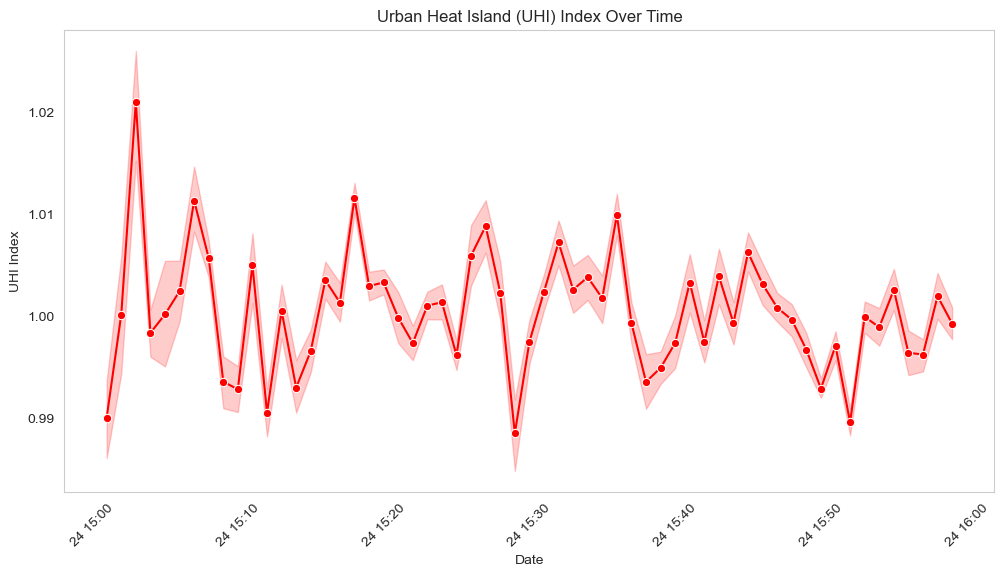

In [44]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=uhi_df, x="datetime", y="UHI Index", color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("UHI Index")
plt.title("Urban Heat Island (UHI) Index Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()



/var/folders/5w/m5jg2y417qdd5h_28np12d380000gp/T/ipykernel_86872/2429446498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=uhi_df, x="Month", y="UHI Index", palette="coolwarm")


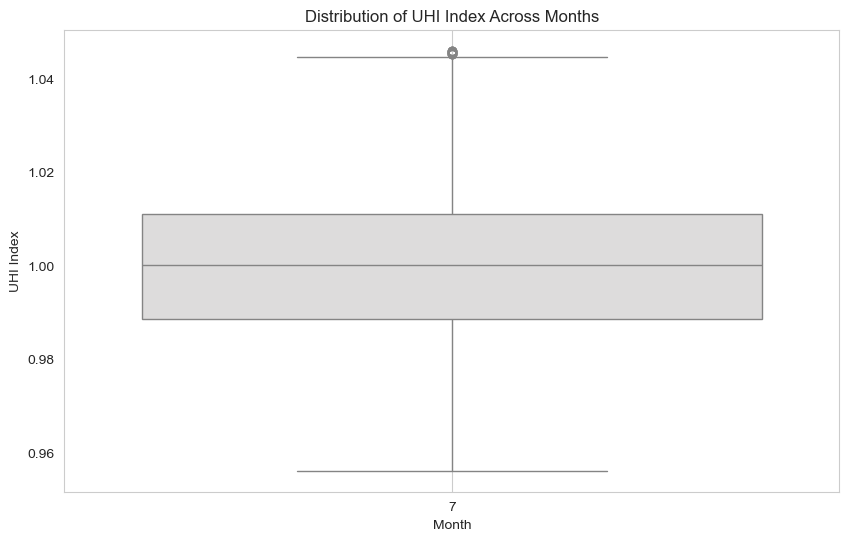

In [45]:
# Boxplot - UHI Index by Month
plt.figure(figsize=(10, 6))
sns.boxplot(data=uhi_df, x="Month", y="UHI Index", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("UHI Index")
plt.title("Distribution of UHI Index Across Months")
plt.grid()
plt.show()


/var/folders/5w/m5jg2y417qdd5h_28np12d380000gp/T/ipykernel_86872/1337964604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=uhi_df, x="Hour", y="UHI Index", palette="coolwarm")


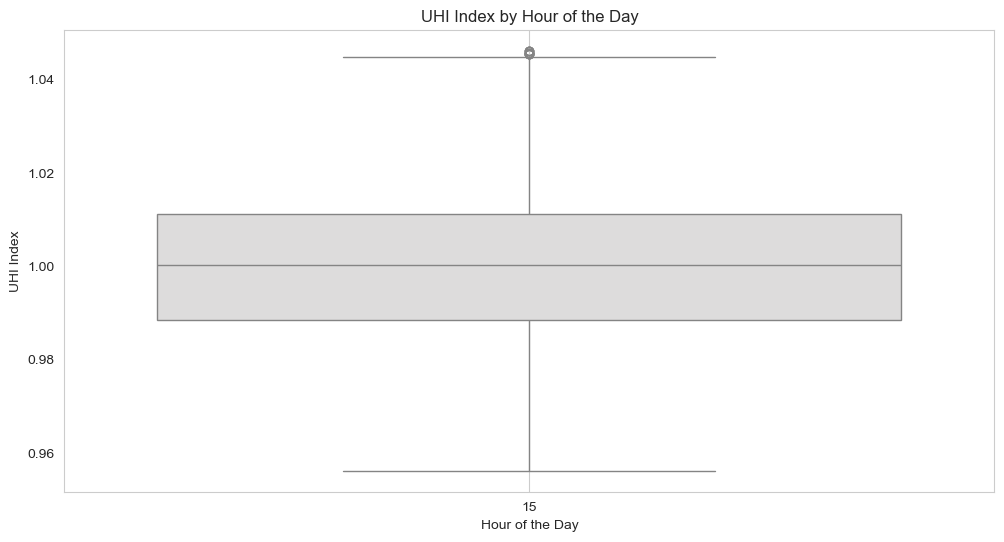

In [46]:
#Boxplot - UHI Index by Hour of Day

plt.figure(figsize=(12, 6))
sns.boxplot(data=uhi_df, x="Hour", y="UHI Index", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("UHI Index")
plt.title("UHI Index by Hour of the Day")
plt.grid()
plt.show()


# Weather Data #

In [47]:
DATA_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

# Check available sheet names
excel_path = os.path.join(DATA_DIR, "NY_Mesonet_Weather.xlsx")
sheets = pd.ExcelFile(excel_path).sheet_names

# Load the Manhattan weather data
manhattan_weather_df = pd.read_excel(excel_path, sheet_name="Manhattan")

# Load the Bronx weather data
bronx_weather_df = pd.read_excel(excel_path, sheet_name="Bronx")

print("Column Names:", bronx_weather_df.columns.tolist())
print("Column Names:", manhattan_weather_df.columns.tolist())

Column Names: ['Date / Time', 'Air Temp at Surface [degC]', 'Relative Humidity [percent]', 'Avg Wind Speed [m/s]', 'Wind Direction [degrees]', 'Solar Flux [W/m^2]']
Column Names: ['Date / Time', 'Air Temp at Surface [degC]', 'Relative Humidity [percent]', 'Avg Wind Speed [m/s]', 'Wind Direction [degrees]', 'Solar Flux [W/m^2]']


Weather Data Cleaning

In [49]:
# Remove leading/trailing spaces from all column names
bronx_weather_df.columns = bronx_weather_df.columns.str.strip()
manhattan_weather_df.columns = manhattan_weather_df.columns.str.strip()

print("Bronx Weather Datetime Sample Values:")
print(bronx_weather_df["Date / Time"].head(10))

print("\nManhattan Weather Datetime Sample Values:")
print(manhattan_weather_df["Date / Time"].head(10))

Bronx Weather Datetime Sample Values:
0    2021-07-24 06:00:00 EDT
1    2021-07-24 06:05:00 EDT
2    2021-07-24 06:10:00 EDT
3    2021-07-24 06:15:00 EDT
4    2021-07-24 06:20:00 EDT
5    2021-07-24 06:25:00 EDT
6    2021-07-24 06:30:00 EDT
7    2021-07-24 06:35:00 EDT
8    2021-07-24 06:40:00 EDT
9    2021-07-24 06:45:00 EDT
Name: Date / Time, dtype: object

Manhattan Weather Datetime Sample Values:
0    2021-07-24 06:00:00 EDT
1    2021-07-24 06:05:00 EDT
2    2021-07-24 06:10:00 EDT
3    2021-07-24 06:15:00 EDT
4    2021-07-24 06:20:00 EDT
5    2021-07-24 06:25:00 EDT
6    2021-07-24 06:30:00 EDT
7    2021-07-24 06:35:00 EDT
8    2021-07-24 06:40:00 EDT
9    2021-07-24 06:45:00 EDT
Name: Date / Time, dtype: object


In [50]:
# Making Date / Time a string
bronx_weather_df["Date / Time"] = bronx_weather_df["Date / Time"].astype(str).str.strip()
manhattan_weather_df["Date / Time"] = manhattan_weather_df["Date / Time"].astype(str).str.strip()


In [51]:
# Handle Missing & Invalid Values Before Conversion
# Count missing values
print("Missing values in Bronx:", bronx_weather_df["Date / Time"].isnull().sum())
print("Missing values in Manhattan:", manhattan_weather_df["Date / Time"].isnull().sum())

# Find non-date values
invalid_bronx = bronx_weather_df[~bronx_weather_df["Date / Time"].str.match(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}", na=False)]
invalid_manhattan = manhattan_weather_df[~manhattan_weather_df["Date / Time"].str.match(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}", na=False)]

print("Invalid Bronx Date Entries:\n", invalid_bronx["Date / Time"].unique())
print("Invalid Manhattan Date Entries:\n", invalid_manhattan["Date / Time"].unique())


Missing values in Bronx: 0
Missing values in Manhattan: 0
Invalid Bronx Date Entries:
 []
Invalid Manhattan Date Entries:
 []


In [57]:
# Using Regex to remove any timezones
import re

# Remove any trailing three-letter timezone (e.g., EDT, EST, UTC, PST, etc.)
bronx_weather_df["Date / Time"] = bronx_weather_df["Date / Time"].str.replace(r"\s[A-Z]{3}$", "", regex=True)
manhattan_weather_df["Date / Time"] = manhattan_weather_df["Date / Time"].str.replace(r"\s[A-Z]{3}$", "", regex=True)

# Convert to datetime
bronx_weather_df["Date / Time"] = pd.to_datetime(bronx_weather_df["Date / Time"], errors="coerce")
manhattan_weather_df["Date / Time"] = pd.to_datetime(manhattan_weather_df["Date / Time"], errors="coerce")

In [58]:
print("Bronx datetime type:", bronx_weather_df["Date / Time"].dtype)
print("Manhattan datetime type:", manhattan_weather_df["Date / Time"].dtype)

print("Bronx Sample Datetime Values:\n", bronx_weather_df["Date / Time"].head())
print("\nManhattan Sample Datetime Values:\n", manhattan_weather_df["Date / Time"].head())


Bronx datetime type: datetime64[ns]
Manhattan datetime type: datetime64[ns]
Bronx Sample Datetime Values:
 0   2021-07-24 06:00:00
1   2021-07-24 06:05:00
2   2021-07-24 06:10:00
3   2021-07-24 06:15:00
4   2021-07-24 06:20:00
Name: Date / Time, dtype: datetime64[ns]

Manhattan Sample Datetime Values:
 0   2021-07-24 06:00:00
1   2021-07-24 06:05:00
2   2021-07-24 06:10:00
3   2021-07-24 06:15:00
4   2021-07-24 06:20:00
Name: Date / Time, dtype: datetime64[ns]


In [60]:
# Convert to datetime format
bronx_weather_df["Date / Time"] = pd.to_datetime(bronx_weather_df["Date / Time"], errors="coerce")
manhattan_weather_df["Date / Time"] = pd.to_datetime(manhattan_weather_df["Date / Time"], errors="coerce")

print("Bronx datetime type:", bronx_weather_df["Date / Time"].dtype)
print("Manhattan datetime type:", manhattan_weather_df["Date / Time"].dtype)

print("Bronx Sample Datetime Values:\n", bronx_weather_df["Date / Time"].head())
print("\nManhattan Sample Datetime Values:\n", manhattan_weather_df["Date / Time"].head())


Bronx datetime type: datetime64[ns]
Manhattan datetime type: datetime64[ns]
Bronx Sample Datetime Values:
 0   2021-07-24 06:00:00
1   2021-07-24 06:05:00
2   2021-07-24 06:10:00
3   2021-07-24 06:15:00
4   2021-07-24 06:20:00
Name: Date / Time, dtype: datetime64[ns]

Manhattan Sample Datetime Values:
 0   2021-07-24 06:00:00
1   2021-07-24 06:05:00
2   2021-07-24 06:10:00
3   2021-07-24 06:15:00
4   2021-07-24 06:20:00
Name: Date / Time, dtype: datetime64[ns]


In [61]:
# Rename to "datetime" for ease
bronx_weather_df.rename(columns={"Date / Time": "datetime"}, inplace=True)
manhattan_weather_df.rename(columns={"Date / Time": "datetime"}, inplace=True)

Merge Weather Data with UHI Index

In [64]:
# Merge UHI with Bronx Weather
uhi_bronx_df = uhi_df.merge(bronx_weather_df, on="datetime", how="left")

# Fill missing values (if any)
uhi_bronx_df.ffill(inplace=True)

In [ ]:
#Merge UHI with Manhattan Weather
uhi_manhattan_df = uhi_df.merge(manhattan_weather_df, on="datetime", how="left")

# Fill missing values (if any)
uhi_manhattan_df.ffill(inplace=True)


/var/folders/5w/m5jg2y417qdd5h_28np12d380000gp/T/ipykernel_86872/983370134.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  uhi_manhattan_df.fillna(method="ffill", inplace=True)
